In [37]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to build linear regression_model
import statsmodels.api as sm

# split the data into train and test
from sklearn.model_selection import train_test_split

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('anime_ratings_data.csv')

In [4]:
df.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


In [6]:
df.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [7]:
#Create new dataframe without changing original
df_new = df.copy()

### Custom function is to visualize the numercal values relationship ###

In [8]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

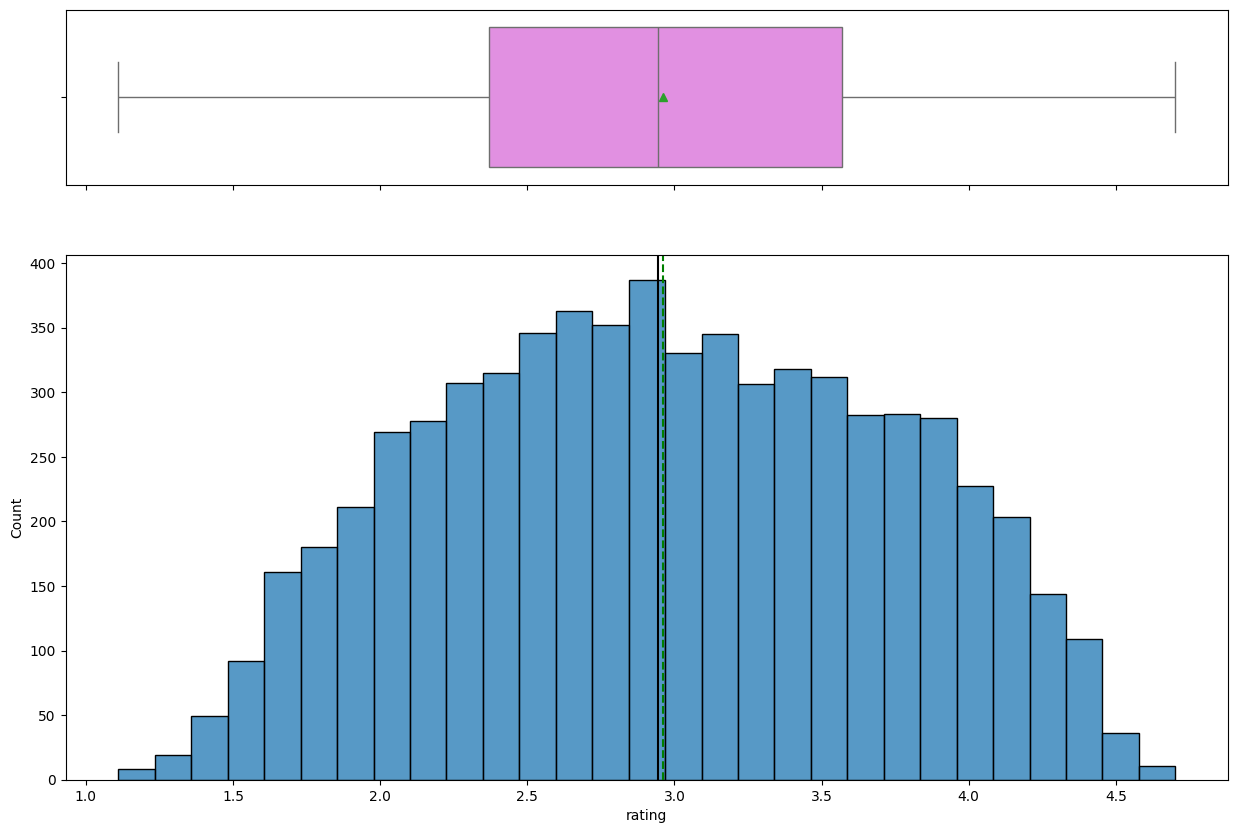

In [9]:
histogram_boxplot(df_new, "rating")

* The anime ratings are close to normally distributed with fatter tails
* Anime are rated approximately 3 by viewers on average

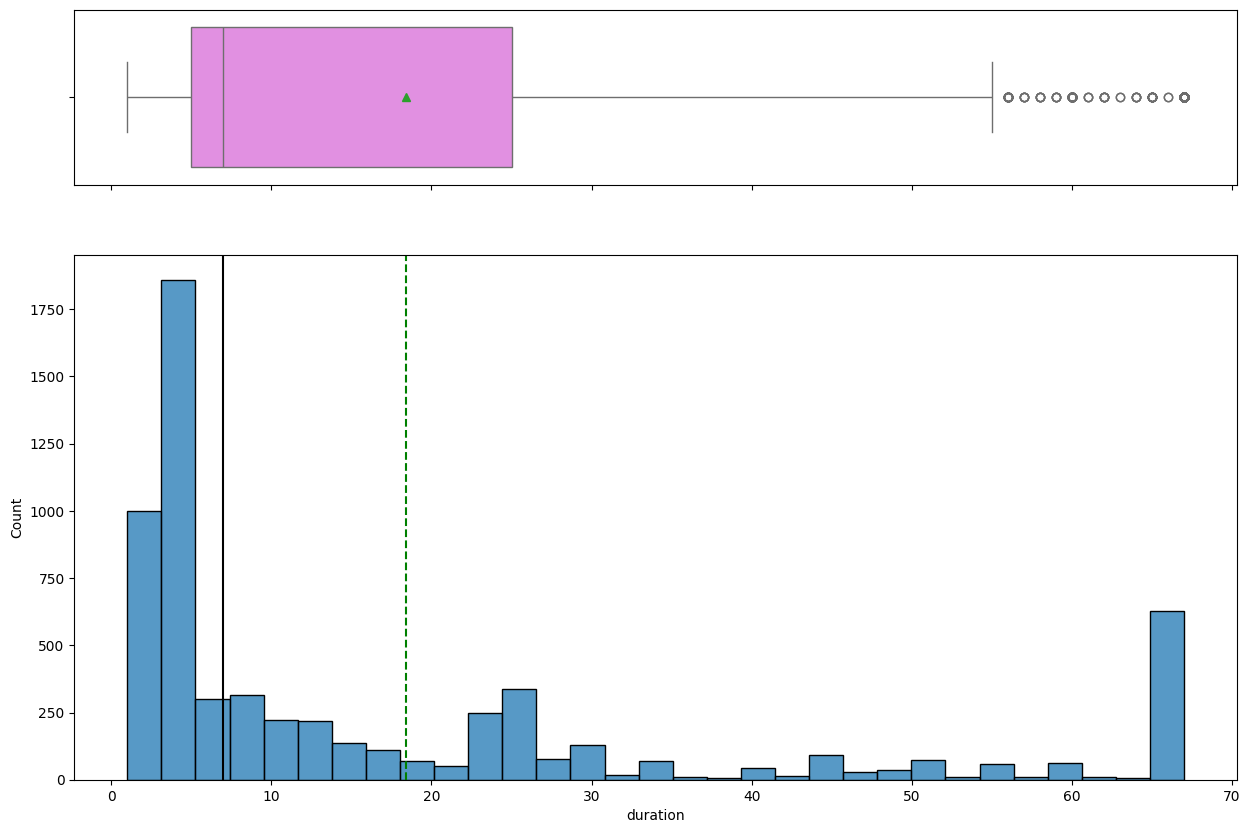

In [71]:
histogram_boxplot(df_new, "duration")

* The distribution for duration column is right-skewed with a median runtime of less than 10 minutes
* There are a few anime with episodes having 1 hour or more runtime, and are likely to be movies

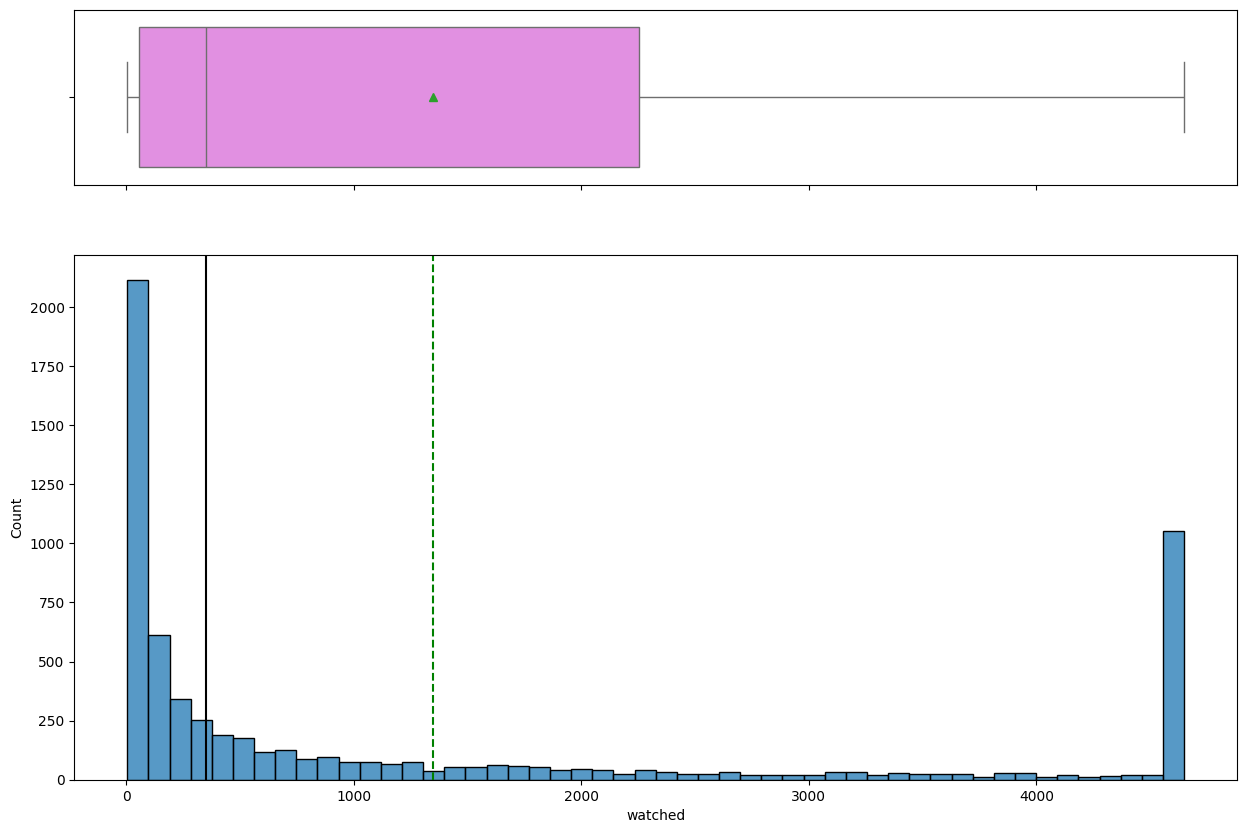

In [72]:
histogram_boxplot(df_new, "watched", bins=50)

* The distribution for watched is heavily right-skewed, and most of the anime having less than 500 viewers
* There is a spike at ~4500 in the histogram, indicating that there are anime which have been viewed by a lot of users

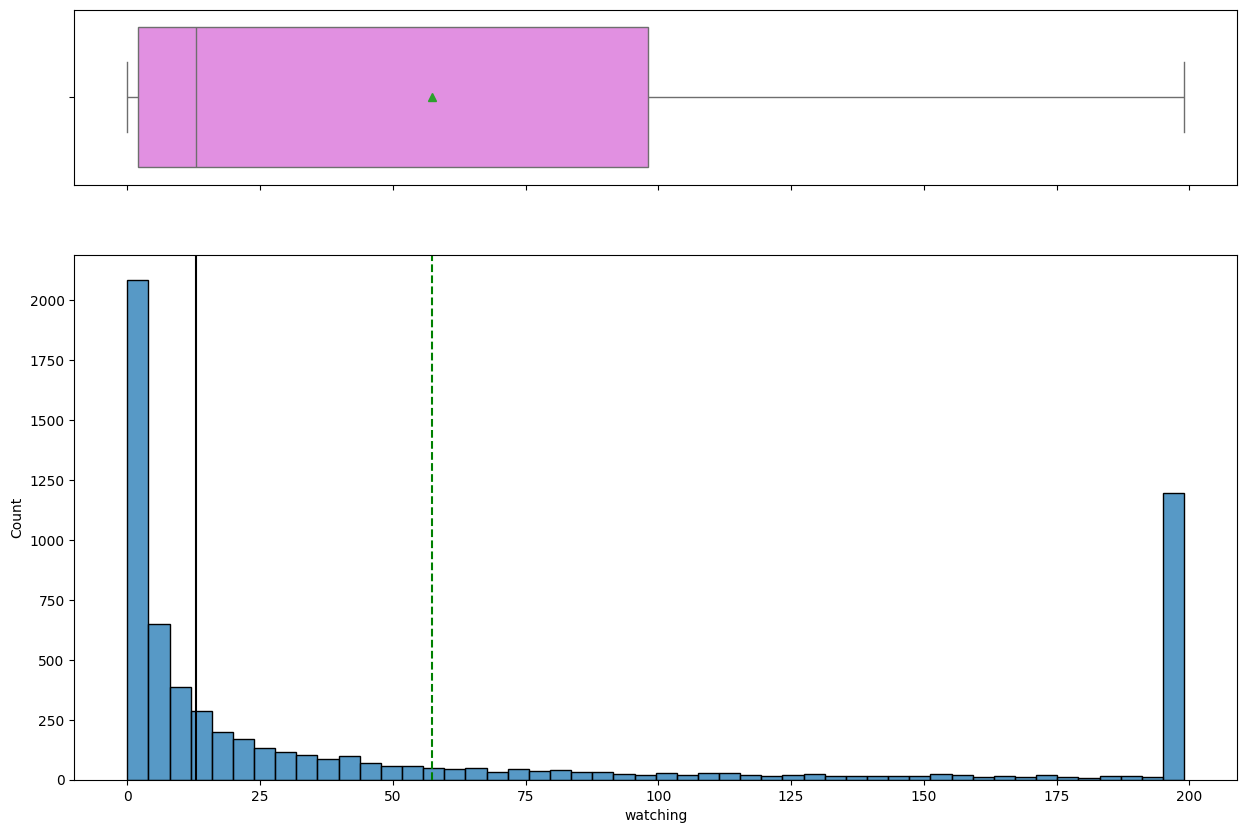

In [73]:
histogram_boxplot(df_new, "watching", bins=50)

* The distribution for `watching` is heavily right-skewed, and most of the anime have less than 50 current viewers
* There is a spike at ~200 in the histogram, indicating that there are anime which are being viewed by a lot of users

### Custom function to visualize the categorical values in to bar plot ###

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

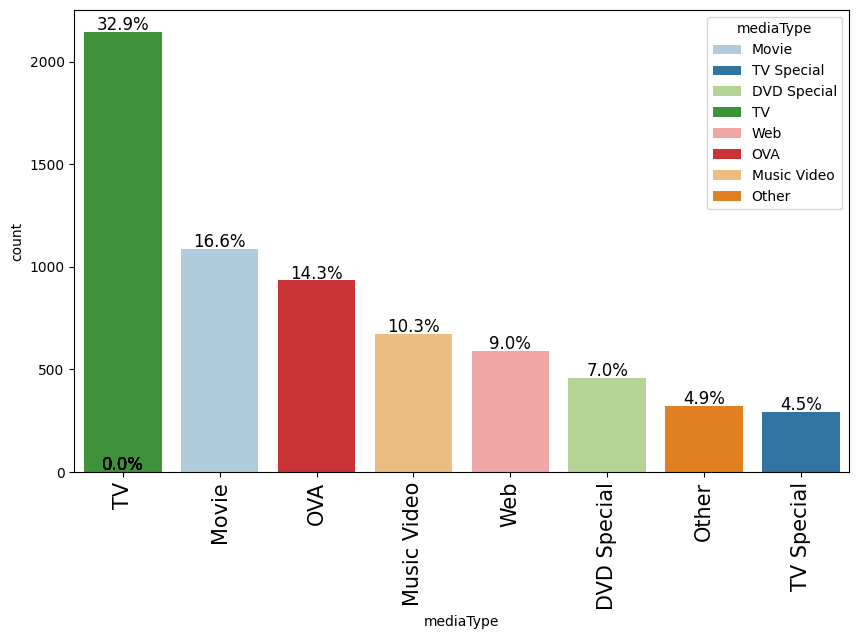

In [11]:
labeled_barplot(df_new, "mediaType", perc=True)

* Approximately one-third of the anime have been released for TV
* 9% of the anime have been released as web series, which is a little surprising

In [12]:
# creating a list of numerical columns
num_cols = df_new.select_dtypes(include=np.number).columns.tolist()

In [13]:

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove("startYr")
num_cols.remove("finishYr")

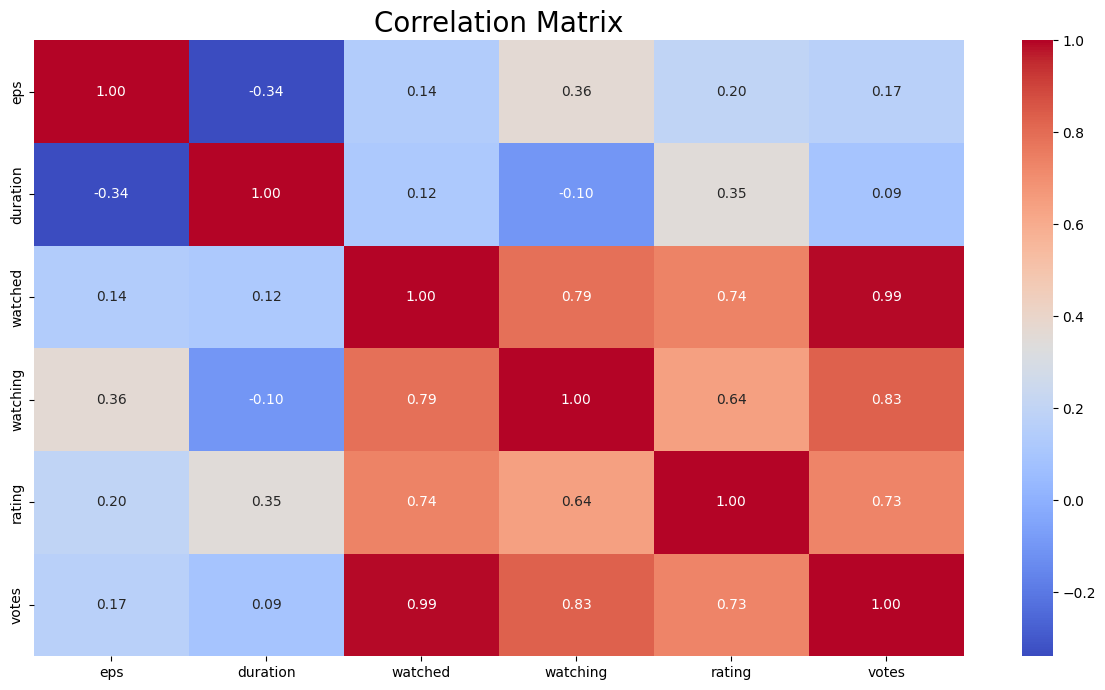

In [14]:
#Create correlation matrix for the numerical columns
corr = df_new[num_cols].corr()

#Plot the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=20)
plt.show()

* The rating of an anime is highly correlated with the number of people who have watched the anime and voted for it on the portal
* The number of people who have watched the anime is highly correlated with the number of people who are watching the anime
* The number of people who have watched the anime is very highly correlated with the number of people who have voted for the anime on the portal

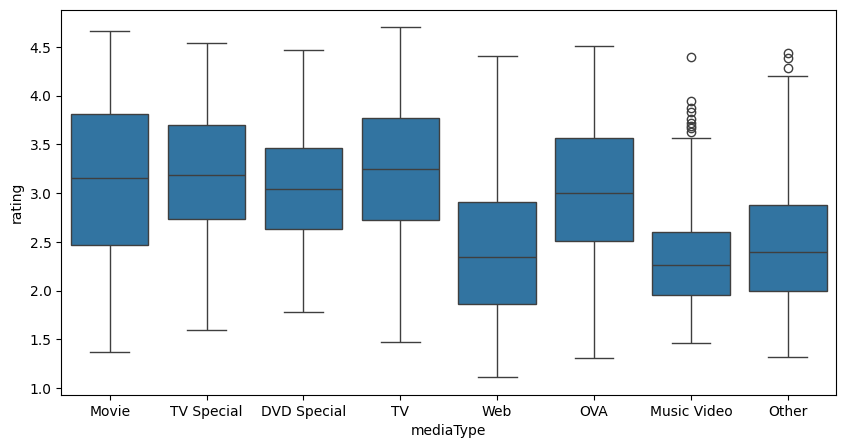

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_new, x="mediaType", y="rating")
plt.show()

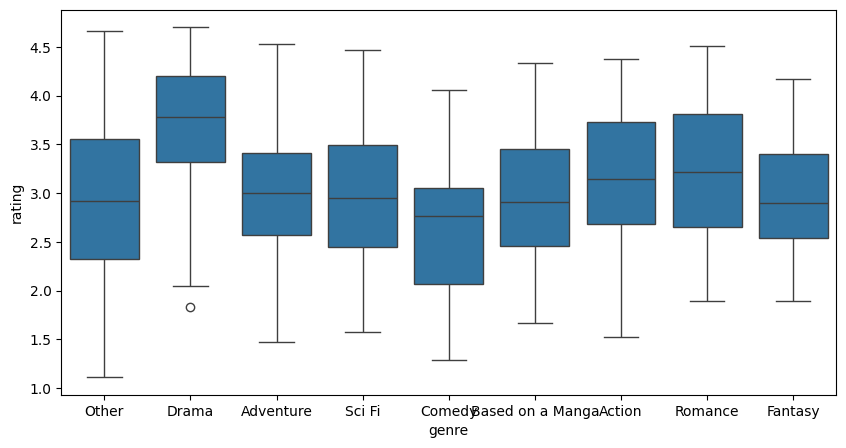

In [82]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_new, x="genre", y="rating")
plt.show()

* Anime under the genre of Drama are rated the highest in general, while those under the genre of Comedy and rated the least

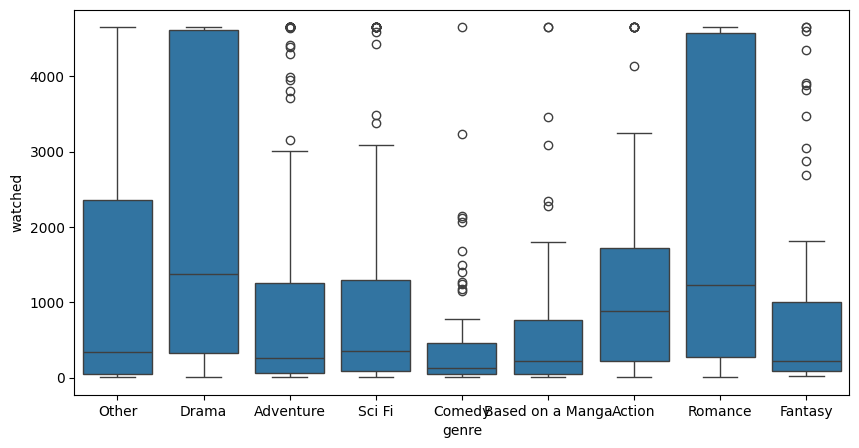

In [83]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_new, x="genre", y="watched")
plt.show()

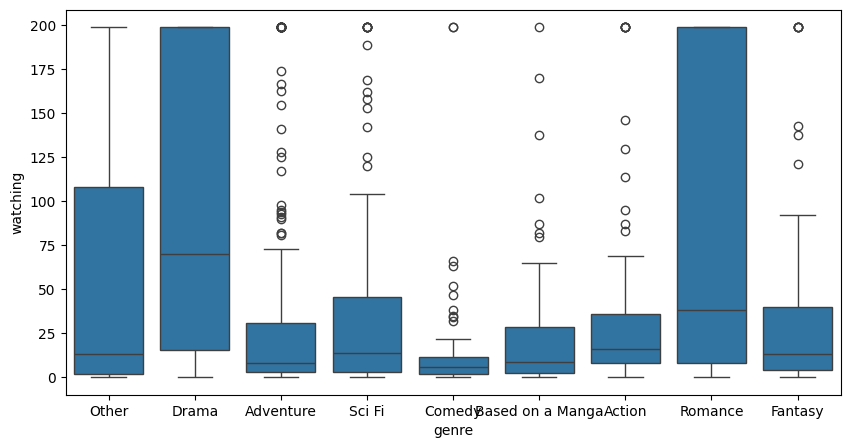

In [84]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_new, x="genre", y="watching")
plt.show()

### Data preprocessing ###

In [16]:
df_new.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [35]:
df_new.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


Let's fix the missing values in the data.

- For the variable `mediaType`, we will impute the missing values with '*Other*' as the exact values for that category are not known
- For the variables `duration` and `votes`, we will impute the missing values in each column with the median grouped by `genre` and `mediaType` as both the columns have skewed distributions

In [17]:
#Get the null rows for mediatype column
df_new[df_new["mediaType"].isnull()]

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
61,Mobile Suit Gundam Battlefield Record: Avant-T...,NaN,1,NaN,2009,2009,"On December 31, U.C. 0079, the Earth Federatio...",No,24,0,2.303,NaN,Sunrise,No,Other
230,Mobile Suit Gundam: The 08th MS Team,NaN,12,NaN,1996,1999,War between the Earth Federation and Zeon has ...,Yes,4649,199,4.260,NaN,Sunrise,No,Other
409,Stratos 4 OVA: Stratos 4.1 - Dutch Roll,NaN,1,NaN,2004,2004,NaN,No,65,4,2.372,NaN,Others,No,Sci Fi
1037,Crazy Monkey,NaN,1,NaN,1980,1980,NaN,Yes,38,0,2.006,NaN,Others,No,Other
1180,Ravex in Tezuka World,NaN,1,NaN,2009,2009,NaN,No,102,2,2.214,NaN,Others,No,Other
1210,Chiisana Penguin Lolo no Bouken,NaN,3,NaN,1986,1987,Scamper is a penguin who loves to explore. Wit...,No,203,3,3.075,NaN,Others,No,Other
1278,Omoi: Greenlights Serenade,NaN,1,NaN,2018,2018,NaN,No,49,0,2.265,NaN,Others,No,Other
2137,Comics,NaN,1,NaN,1979,1979,NaN,No,37,0,1.514,NaN,Others,No,Other
2287,Pretty Cure Splash Star Magic Doki 3D Theater ...,NaN,1,NaN,2006,2006,A Hope Seed has suddenly sprouted from Flappy'...,No,59,4,2.779,NaN,Others,No,Other
2414,Yoru no Hi,NaN,1,NaN,2005,2005,NaN,No,122,0,1.600,NaN,Others,No,Other


In [18]:
#Fill the null values with other for the mediatype column
df_new["mediaType"].fillna("Other", inplace=True)

C:\Users\matha\AppData\Local\Temp\ipykernel_6348\2948624977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new["mediaType"].fillna("Other", inplace=True)


In [19]:
#Get the null rows for mediatype column
df_new[df_new["mediaType"].isnull()]

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre


In [20]:
df_new["duration"] = df_new["duration"].fillna(
    value=df_new.groupby(["genre", "mediaType"])["duration"].transform("median")
)
df_new["votes"] = df_new["votes"].fillna(
    value=df_new.groupby(["genre", "mediaType"])["votes"].transform("median")
)

In [21]:
df_new.isnull().sum()

title                0
mediaType            0
eps                  0
duration             8
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

- All the missing values have been treated except description(i.e., description field is not really need to treat).

* We will impute the remaining missing values in the `duration` column with the median grouped by `genre`

In [22]:
df_new["duration"] = df_new["duration"].fillna(
    value=df_new.groupby(["genre"])["duration"].transform("median")
)

df_new.isnull().sum()

title                0
mediaType            0
eps                  0
duration             0
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

### Feature Engineering ###

In [23]:
# As noticed, start year and end year column is not really needed if we generate new column for duration of the anime
df_new["years_running"] = df_new["finishYr"] - df_new["startYr"]
df_new.drop(["startYr", "finishYr"], axis=1, inplace=True)
df_new.head()

,title,mediaType,eps,duration,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Kuripuri*Kuripura,Movie,1,5.0,NaN,No,10,0,2.120,10.0,Others,No,Other,0
2,GJ-bu@,TV Special,1,46.0,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,Miru Tights Special,DVD Special,1,4.0,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other,0


## Outliers detection using box plot ##

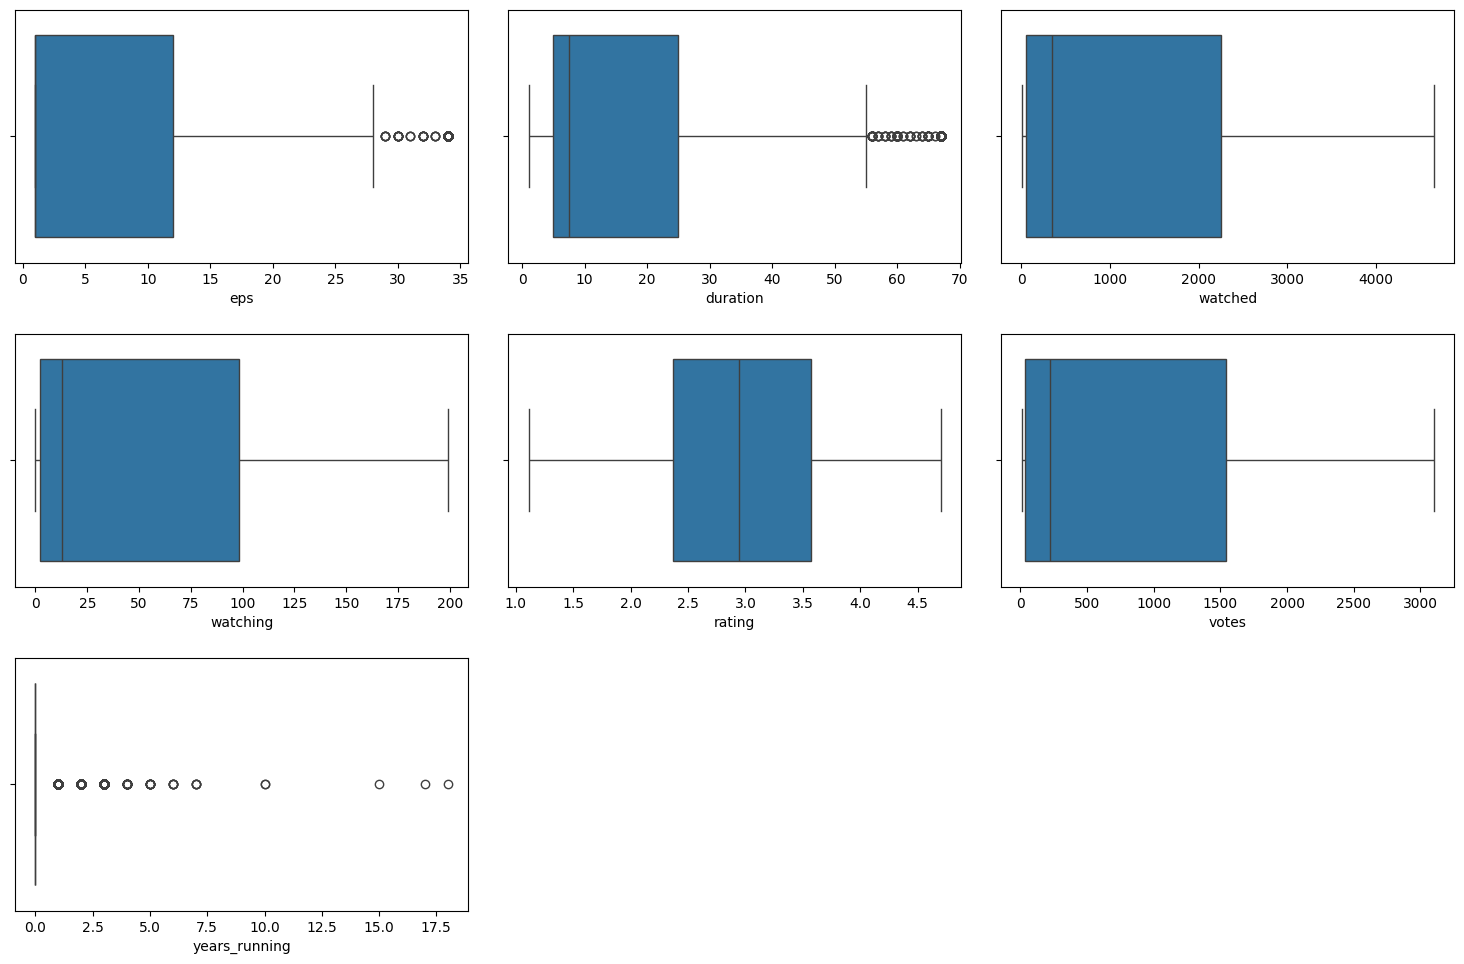

In [24]:
# outlier detection using boxplot
num_cols = df_new.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df_new, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are few outliers detected on the eps & duration field. we are not going to drop hence it may be the original data

- We will drop the title and description field since it is not required for model building and it may be overloaded

In [25]:
#Drop title and description fields from the dataframe
df_new.drop(["title", "description"], axis=1, inplace=True)

In [26]:
df_new.head()

,mediaType,eps,duration,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Movie,1,67.0,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Movie,1,5.0,No,10,0,2.120,10.0,Others,No,Other,0
2,TV Special,1,46.0,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Movie,1,67.0,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,DVD Special,1,4.0,No,346,8,2.494,234.0,Others,No,Other,0


### Data Preparation for Modeling

- We want to predict the rating of an anime
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [27]:
# defining X and y variables(AS WE NEED TO  ANALYZE THE RATING, LETS MAKE IT AS Y VARIABLE)
X = df_new.drop(["rating"], axis=1) # drop the target variable
y = df_new["rating"] # keep only the target variable

print(X.head())
print(y.head())

     mediaType  eps  duration contentWarn  watched  watching   votes  \
0        Movie    1      67.0          No     4649        86  3100.0   
1        Movie    1       5.0          No       10         0    10.0   
2   TV Special    1      46.0          No     1630        16  1103.0   
3        Movie    1      67.0          No     4649       184  3100.0   
4  DVD Special    1       4.0          No      346         8   234.0   

   studio_primary studios_colab  genre  years_running  
0  Toei Animation            No  Other              0  
1          Others            No  Other              0  
2          Others            No  Other              0  
3          Others            No  Drama              0  
4          Others            No  Other              0  
0    3.979
1    2.120
2    3.758
3    4.444
4    2.494
Name: rating, dtype: float64


- In stats model library while doing a model building we need to add the constant(y - intercept) 
- y = B0+B1X1+B2X2 (here b0 is the constant that we are adding in the above point)


In [28]:
# let's add the intercept to data
X = sm.add_constant(X)

In [29]:
X.head()

,const,mediaType,eps,duration,contentWarn,watched,watching,votes,studio_primary,studios_colab,genre,years_running
0,1.0,Movie,1,67.0,No,4649,86,3100.0,Toei Animation,No,Other,0
1,1.0,Movie,1,5.0,No,10,0,10.0,Others,No,Other,0
2,1.0,TV Special,1,46.0,No,1630,16,1103.0,Others,No,Other,0
3,1.0,Movie,1,67.0,No,4649,184,3100.0,Others,No,Drama,0
4,1.0,DVD Special,1,4.0,No,346,8,234.0,Others,No,Other,0


In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           6523 non-null   float64
 1   mediaType       6523 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6523 non-null   float64
 4   contentWarn     6523 non-null   object 
 5   watched         6523 non-null   int64  
 6   watching        6523 non-null   int64  
 7   votes           6523 non-null   float64
 8   studio_primary  6523 non-null   object 
 9   studios_colab   6523 non-null   object 
 10  genre           6523 non-null   object 
 11  years_running   6523 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 611.7+ KB


- Convert categorical columns into numerical columns since model will understand only numbers
- To convert cateforical columns into normal columns *Perform one-hot encoding*

In [30]:
# perform one-hot encoding with categorical columns
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

X.head()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1,67.0,4649,86,3100.0,0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,1.0,1,5.0,10,0,10.0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,1,46.0,1630,16,1103.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1,67.0,4649,184,3100.0,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.0,1,4.0,346,8,234.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
#Convert all the columns into type float to proceed further
X = X.astype(float)

In [102]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   const                             6523 non-null   float64
 1   eps                               6523 non-null   float64
 2   duration                          6523 non-null   float64
 3   watched                           6523 non-null   float64
 4   watching                          6523 non-null   float64
 5   votes                             6523 non-null   float64
 6   years_running                     6523 non-null   float64
 7   mediaType_Movie                   6523 non-null   float64
 8   mediaType_Music Video             6523 non-null   float64
 9   mediaType_OVA                     6523 non-null   float64
 10  mediaType_Other                   6523 non-null   float64
 11  mediaType_TV                      6523 non-null   float64
 12  mediaT

- Split the train and test data with 70:30 ratio (i.e., 70% as train data and 30% as test data)

In [32]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4566
Number of rows in test data = 1957


## Model Building - Linear Regression

In [34]:
x_train

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
5432,1.0,3.0,40.0,399.0,11.0,213.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5326,1.0,1.0,5.0,24.0,0.0,15.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1021,1.0,4.0,28.0,4649.0,199.0,3100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
836,1.0,26.0,5.0,940.0,153.0,715.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1396,1.0,1.0,4.0,20.0,1.0,14.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,1.0,2.0,37.0,0.0,22.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5192,1.0,13.0,8.0,18.0,2.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3980,1.0,24.0,12.0,4649.0,199.0,3100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
235,1.0,34.0,5.0,4649.0,199.0,3100.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
# Check for NaN values
print("NaN in x_train:", np.isnan(x_train).sum())
print("NaN in y_train:", np.isnan(y_train).sum())

NaN in x_train: const                               0
eps                                 0
duration                            0
watched                             0
watching                            0
votes                               0
years_running                       0
mediaType_Movie                     0
mediaType_Music Video               0
mediaType_OVA                       0
mediaType_Other                     0
mediaType_TV                        0
mediaType_TV Special                0
mediaType_Web                       0
contentWarn_Yes                     0
studio_primary_J.C. Staff           0
studio_primary_MADHOUSE             0
studio_primary_OLM                  0
studio_primary_Others               0
studio_primary_Production I.G       0
studio_primary_Studio Deen          0
studio_primary_Studio Pierrot       0
studio_primary_Sunrise              0
studio_primary_TMS Entertainment    0
studio_primary_Toei Animation       0
studios_colab_Yes                 

In [36]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     357.4
Date:                Sat, 04 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:34:59   Log-Likelihood:                -2307.9
No. Observations:                4566   AIC:                             4684.
Df Residuals:                    4532   BIC:                             4902.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.722**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **2.7707**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `duration` is **0.0123**.

### Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [38]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [39]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.40112,0.330417,0.722387,0.720304,12.444742


In [41]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.413096,0.340426,0.703053,0.6978,12.56679


**Observations**

- The training $R^2$ is 0.72, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict anime ratings within a mean error of 0.34 on the test data

- MAPE of 12.6 on the test data means that we are able to predict within 12.6% of the anime ratings

## Conclusion

- We have seen how to build a linear regression model, how to predict the rating of an anime using various factors, and how to check the model's performance.

- Next, we have to check the statistical validity of our model. For this, we will check if the model satisfies the assumptions of linear regression. Only then we will be able to make inferences from it.